# test

data/Haier/small-screw/outputs/469.json
{'object': [{'name': '0', 'bndbox': {'xmin': 223, 'ymin': 238, 'xmax': 277, 'ymax': 298}}, {'name': '0', 'bndbox': {'xmin': 966, 'ymin': 249, 'xmax': 1032, 'ymax': 315}}, {'name': '0', 'bndbox': {'xmin': 217, 'ymin': 358, 'xmax': 265, 'ymax': 418}}, {'name': '0', 'bndbox': {'xmin': 181, 'ymin': 875, 'xmax': 229, 'ymax': 923}}, {'name': '0', 'bndbox': {'xmin': 181, 'ymin': 945, 'xmax': 235, 'ymax': 993}}, {'name': '1', 'bndbox': {'xmin': 247, 'ymin': 821, 'xmax': 289, 'ymax': 863}}, {'name': '1', 'bndbox': {'xmin': 932, 'ymin': 839, 'xmax': 974, 'ymax': 875}}, {'name': '1', 'bndbox': {'xmin': 241, 'ymin': 1301, 'xmax': 283, 'ymax': 1343}}, {'name': '1', 'bndbox': {'xmin': 902, 'ymin': 1319, 'xmax': 950, 'ymax': 1361}}, {'name': '1', 'bndbox': {'xmin': 247, 'ymin': 1644, 'xmax': 283, 'ymax': 1680}}, {'name': '1', 'bndbox': {'xmin': 884, 'ymin': 1662, 'xmax': 926, 'ymax': 1704}}, {'name': '2', 'bndbox': {'xmin': 145, 'ymin': 1548, 'xmax': 199, 'ymax

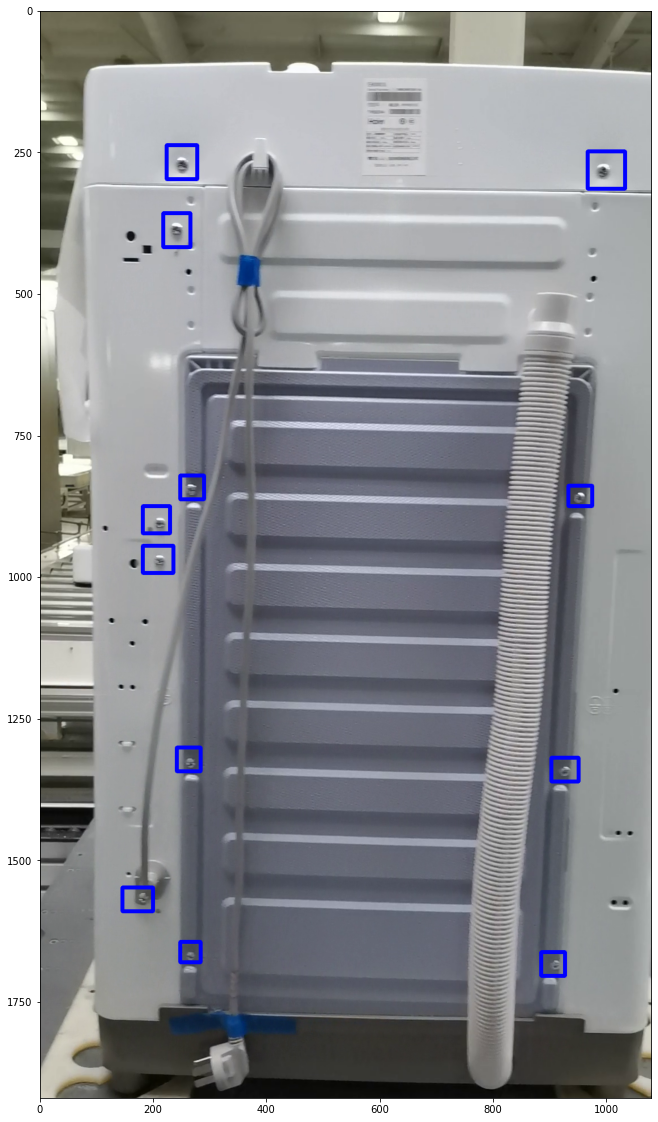

In [28]:
import glob
from PIL import Image
import numpy as np,json
import matplotlib.pyplot as plt
import cv2

jsons = glob.glob("data/Haier/*/*/*.json")


img = jsons[5].replace("outputs","images").replace(".json",".png")
print(jsons[5])
j_s = json.load(open(jsons[5]))

img = np.array(Image.open(img))
if j_s["outputs"]:
    print(j_s["outputs"])

    for _ in j_s["outputs"]["object"]:
        print(_)
        x1,y1,x2,y2 = _["bndbox"]["xmin"],_["bndbox"]["ymin"],_["bndbox"]["xmax"],_["bndbox"]["ymax"]

        print(x1,y1,x2,y2)
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 5)

    
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()


In [8]:
train_obj =[]
traget_obj = []

import glob
from PIL import Image
import numpy as np,json
import matplotlib.pyplot as plt
import cv2,os


jsons = glob.glob("data/Haier/*/*/*.json")




for obj  in jsons:
    txt = open(obj,"rb").read().decode()
    j_s = json.loads(txt)
    
    img = obj.replace("outputs","images")
    
    if "big-screw" in obj:
        img = img.replace(".json",".jpg")
    else:
        img = img.replace(".json",".png")

    target_name = obj.split("\\")[-3]
    if os.path.exists(img):
        box =[]
        if j_s["outputs"]:
            for _ in j_s["outputs"]["object"]:
                
                x1,y1,x2,y2 = _["bndbox"]["xmin"],_["bndbox"]["ymin"],_["bndbox"]["xmax"],_["bndbox"]["ymax"]
                
                
                train_obj.append(f"{img},{x1},{y1},{x2},{y2},{target_name}")
                traget_obj.append([ x1,y1,x2,y2 ])
                
                
        
    else:
        print("Img Not Find",img)






In [10]:
with open("train.txt","w") as f:
    f.write("\n".join(train_obj[:5200]))
with open("test.txt","w") as f:
    f.write("\n".join(train_obj[5200:]))


In [9]:
len(train_obj)

5699